# Support Vector Machines

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import scipy.io as sio

## Part 1: Linear Models

In [3]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex6\ex6\ex6data1.mat')

In [4]:
X = data['X']
y = data['y'].ravel()

In [5]:
fig, ax = plt.subplots(1)

ax.plot(X[y==0, 0], X[y==0, 1], 'r.', label='No')
ax.plot(X[y==1, 0], X[y==1, 1], 'y.', label='Yes')
ax.legend()
plt.show()

In [6]:
model_linear = svm.SVC(C=1, kernel='linear')
model_linear.fit(X, y)

In [7]:
# plotting decision boundary

w = model_linear.coef_
c = model_linear.intercept_
w1 = w[0][0]
w2 = w[0][1]
c = c[0]

fig, ax = plt.subplots(1)

xp = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

yp = -(xp*w1 + c)/w2
ax.plot(xp, yp, 'w-')
ax.plot(X[y==0, 0], X[y==0, 1], 'r.', label='No')
ax.plot(X[y==1, 0], X[y==1, 1], 'y.', label='Yes')
ax.legend()
ax.set_title('Linear Kernel with C = 1')
plt.show()

In [8]:
# plotting decision contour

x0 = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 10)
x1 = np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 10)
xx, yy = np.meshgrid(x0, x1)
z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)


fig, ax = plt.subplots(1)
ax.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[y==0, 0], X[y==0, 1], c='y', s=5, label='No')
ax.scatter(X[y==1, 0], X[y==1, 1], c='k', s=5, label='Yes')
ax.legend()
ax.set_title('Linear Kernel with C = 1')
plt.show()


## Part 2: Using Gausian Kernel

In [9]:
def gausian_kernel(x1, x2, sigma=0.1):
    return np.exp( -np.sum((x1-x2)**2) / (2*(sigma**2)) );

In [10]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex6\ex6\ex6data2.mat')
X = data['X']
y = data['y'].ravel()

In [11]:
fig, ax = plt.subplots(1)

ax.scatter(X[y==0, 0], X[y==0, 1], c='r', s=1.5, label='No')
ax.scatter(X[y==1, 0], X[y==1, 1], c='y', s=1.5, label='Yes')
ax.legend()
plt.show()

In [21]:
C = 1
sigma = 0.2
gamma = 1/(2*(sigma**2))
model = svm.SVC(C=1, kernel='rbf', gamma=gamma )
model.fit(X, y)

In [22]:
acc = y[y==model.predict(X)].size/y.size*100
print(acc)

In [23]:
# plotting decision contour

x0 = np.linspace(X[:, 0].min()-0.05, X[:, 0].max()+0.05, 10)
x1 = np.linspace(X[:, 1].min()-0.05, X[:, 1].max()+0.05, 10)
x0, x1 = np.meshgrid(x0, x1)
z = model.predict(np.c_[x0.ravel(), x1.ravel()])
z = z.reshape(xx.shape)


fig, ax = plt.subplots(1)
ax.contourf(x0, x1, z, cmap='RdGy', levels=1,  alpha=0.8)
ax.scatter(X[y==0, 0], X[y==0, 1], c='b', s=5, label='No')
ax.scatter(X[y==1, 0], X[y==1, 1], c='k', s=5, label='Yes')
ax.legend()
ax.set_title('Gaussian Kernel with C = 1, sigma = 0.1')
plt.show()

# Part 3: Dataset 3

In [3]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex6\ex6\ex6data3.mat')
X = data['X']
y = data['y'].ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
C, sigma = 3, 0.1
gamma = 1/(2*sigma**2)
model3 = svm.SVC(C=C, gamma=gamma, kernel='rbf')
model3.fit(X_train, y_train)
acc_test = y_test[y_test==model3.predict(X_test)].size/y_test.size*100
acc_train = y_train[y_train==model3.predict(X_train)].size/y_train.size*100
print(acc_train, acc_test)

        # print(model3.coef_, model3.intercept_)
# print(acc)

96.42857142857143 88.37209302325581


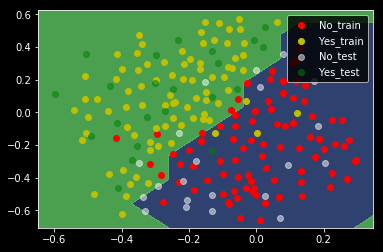

In [8]:
# w = model3.coef_
# c = model3.intercept_
# w1 = w[0][0]
# w2 = w[0][1]
# c = c[0]
x0 = np.linspace(X[:, 0].min()-0.05, X[:, 0].max()+0.05, 10)
x1 = np.linspace(X[:, 1].min()-0.05, X[:, 1].max()+0.05, 10)
x0, x1 = np.meshgrid(x0, x1)
z = model3.predict(np.c_[x0.ravel(), x1.ravel()])
z = z.reshape(x0.shape)

fig, ax = plt.subplots(1)

# xp = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# yp = -(xp*w1 + c)/w2
# ax.plot(xp, yp, 'w-')

ax.contourf(x0, x1, z, levels=1, alpha=0.8)
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r', label='No_train')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='y', label='Yes_train')

ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='w', label='No_test', alpha=0.5)
ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', label='Yes_test', alpha=0.5)

ax.legend()
plt.show()

In [9]:
values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
acc = [ [0]*len(values) for _ in range(len(values)) ]

print('C', '\t', 'sigma', '\t', 'Testing Accuracy')
print('----', '\t', '----', '\t', '--------')
for i in range(len(values) ):
    for j in range(len(values)):
        C, sigma = values[i], values[j]
        gamma = 1/(2*sigma**2)
        model3 = svm.SVC(C=C, gamma=gamma, kernel='rbf')
        model3.fit(X_train, y_train)
        acc[i][j] = y_test[y_test==model3.predict(X_test)].size/y_test.size*100
        print(C, '\t', sigma, '\t', acc[i][j])


C 	 sigma 	 Testing Accuracy
---- 	 ---- 	 --------
0.01 	 0.01 	 58.139534883720934
0.01 	 0.03 	 74.4186046511628
0.01 	 0.1 	 83.72093023255815
0.01 	 0.3 	 83.72093023255815
0.01 	 1 	 79.06976744186046
0.01 	 3 	 79.06976744186046
0.01 	 10 	 79.06976744186046
0.01 	 30 	 79.06976744186046
0.03 	 0.01 	 58.139534883720934
0.03 	 0.03 	 74.4186046511628
0.03 	 0.1 	 83.72093023255815
0.03 	 0.3 	 83.72093023255815
0.03 	 1 	 79.06976744186046
0.03 	 3 	 79.06976744186046
0.03 	 10 	 79.06976744186046
0.03 	 30 	 79.06976744186046
0.1 	 0.01 	 58.139534883720934
0.1 	 0.03 	 74.4186046511628
0.1 	 0.1 	 83.72093023255815
0.1 	 0.3 	 83.72093023255815
0.1 	 1 	 81.3953488372093
0.1 	 3 	 79.06976744186046
0.1 	 10 	 79.06976744186046
0.1 	 30 	 79.06976744186046
0.3 	 0.01 	 58.139534883720934
0.3 	 0.03 	 74.4186046511628
0.3 	 0.1 	 81.3953488372093
0.3 	 0.3 	 81.3953488372093
0.3 	 1 	 83.72093023255815
0.3 	 3 	 79.06976744186046
0.3 	 10 	 79.06976744186046
0.3 	 30 	 79.069767

In [ ]:
# Choosing the value of C = 3, sigma = 0.1
# This is because of higher variance in data